In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to data
file_path_joebiden = r'C:\Users\iurch\OneDrive\DataCircle\project_data\hashtag_joebiden.csv'
file_path_donaldtrump = r'C:\Users\iurch\OneDrive\DataCircle\project_data\hashtag_donaldtrump.csv'


#Columns to read
columns_to_read = ['created_at', 'tweet_id', 'tweet','likes', 'retweet_count','user_id', 'user_screen_name', 'user_join_date', 'user_followers_count', 
                   'user_location', 'lat', 'long','country', 'continent', 'state', 'state_code','collected_at']

try:
    df_joebiden = pd.read_csv(file_path_joebiden, usecols=columns_to_read,  engine='python')
    df_donaldtrump = pd.read_csv(file_path_donaldtrump, usecols=columns_to_read, engine='python')
    print("Data loaded successfully.")
    print(df_joebiden.head())
except Exception as e:
    print("Error loading data:", e)

print(df_joebiden.head())
print(df_donaldtrump.head())


Data loaded successfully.
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

                 user_id user_screen_name       user_join_date  \
0            360666534.0  elsollatinonews  2011-08-23 15:33:45   
1            809904438.0     Biloximeemaw  2012-09-08 01:03:57   
2           

In [3]:
# Display basic information about the datasets
print("\nDonald Trump Data:")
print(df_donaldtrump.info())


Donald Trump Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   user_id               970929 non-null  object 
 6   user_screen_name      970933 non-null  object 
 7   user_join_date        970779 non-null  object 
 8   user_followers_count  970917 non-null  object 
 9   user_location         675830 non-null  object 
 10  lat                   445702 non-null  object 
 11  long                  445705 non-null  object 
 12  country               442732 non-null  object 
 13  continent             442749 non-null  object 
 14  state                 320614 non

In [4]:
print("\nJoe Biden Data:")
print(df_joebiden.info())


Joe Biden Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777073 entries, 0 to 777072
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   user_id               776889 non-null  object 
 6   user_screen_name      776895 non-null  object 
 7   user_join_date        776784 non-null  object 
 8   user_followers_count  776885 non-null  object 
 9   user_location         543063 non-null  object 
 10  lat                   355284 non-null  object 
 11  long                  355284 non-null  object 
 12  country               353770 non-null  object 
 13  continent             353788 non-null  object 
 14  state                 260191 non-nu

In [5]:
# Transforming dtypes joebiden Data
# columns to datetime
parse_dates = ['created_at', 'user_join_date', 'collected_at']
for date_column in parse_dates:
    df_joebiden[date_column] = pd.to_datetime(df_joebiden[date_column], errors='coerce')

print(df_joebiden.dtypes) 

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
user_id                         object
user_screen_name                object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
dtype: object


In [6]:
# Transforming dtypes donald trump Data
# columns to datetime
parse_dates = ['created_at', 'user_join_date', 'collected_at']
for date_column in parse_dates:
    df_donaldtrump[date_column] = pd.to_datetime(df_donaldtrump[date_column], errors='coerce')

print(df_donaldtrump.dtypes) 

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
user_id                         object
user_screen_name                object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
dtype: object


Now we have to transform columns to the right datatype
tweet_id                        int64
tweet                           str
likes                           float64
retweet_count                  float64
user_id                         object
user_name                       object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object

In [7]:
# Convert 'tweet_id' to numeric, invalid parsing will be set as NaN
df_joebiden['tweet_id_numeric'] = pd.to_numeric(df_joebiden['tweet_id'], errors='coerce')
# Trump Tweet_ID
df_donaldtrump['tweet_id_numeric'] = pd.to_numeric(df_donaldtrump['tweet_id'], errors='coerce')

In [8]:
# Drop rows where 'tweet_id_numeric' is NaN 
df_joebiden = df_joebiden.dropna(subset=['tweet_id_numeric'])
# Trump Tweet_ID
df_donaldtrump = df_donaldtrump.dropna(subset=['tweet_id_numeric'])

In [9]:
# Now convert 'tweet_id_numeric' to 'int64'
df_joebiden['tweet_id_numeric'] = df_joebiden['tweet_id_numeric'].astype('int64')
# Trump Tweet_ID
df_donaldtrump['tweet_id_numeric'] = df_donaldtrump['tweet_id_numeric'].astype('int64')

In [10]:
#Check
df_joebiden['tweet_id_numeric'].info
df_donaldtrump['tweet_id_numeric'].info

<bound method Series.info of 0         1316529221557252096
1         1316529222748430336
2         1316529228091846912
3         1316529227471237120
4         1316529252301451264
                 ...         
971082    1325588843488276480
971083    1325588866045194240
971084    1325588885515227136
971085    1325588892905402368
971086    1325588894482534400
Name: tweet_id_numeric, Length: 970926, dtype: int64>

In [11]:
# Drop the old 'tweet_id' column 
df_joebiden = df_joebiden.drop(columns=['tweet_id']).rename(columns={'tweet_id_numeric': 'tweet_id'})
df_donaldtrump = df_donaldtrump.drop(columns=['tweet_id']).rename(columns={'tweet_id_numeric': 'tweet_id'})

In [12]:
#Cheking duplicates
df_joebiden['tweet_id'].duplicated().sum()

1856

In [13]:
df_joebiden = df_joebiden.drop_duplicates(subset=['tweet_id'])

In [14]:
df_donaldtrump['tweet_id'].duplicated().sum()

1347

In [15]:
df_donaldtrump = df_donaldtrump.drop_duplicates(subset=['tweet_id'])
df_donaldtrump['tweet_id'].duplicated().sum()

0

In [16]:
#Converting 'tweet' column to string format
df_joebiden['tweet'] = df_joebiden['tweet'].astype(str)
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].astype(str)

In [17]:
df_joebiden['tweet'].duplicated().sum()

6649

In [18]:
df_donaldtrump['tweet'].duplicated().sum()

11043

In [19]:
# Drop duplicates based on 'tweet' column for the entire DataFrame
df_joebiden = df_joebiden.drop_duplicates(subset=['tweet'])
df_donaldtrump = df_donaldtrump.drop_duplicates(subset=['tweet'])

In [20]:
#Likes column cleaning

# Convert 'likes' to numeric, invalid parsing will be set as NaN
df_joebiden['likes_numeric'] = pd.to_numeric(df_joebiden['likes'], errors='coerce')
# Trump likes
df_donaldtrump['likes_numeric'] = pd.to_numeric(df_donaldtrump['likes'], errors='coerce')

In [21]:
# Drop rows where 'likes_numeric' is NaN 
df_joebiden = df_joebiden.dropna(subset=['likes_numeric'])
# Trump Tweet_ID
df_donaldtrump = df_donaldtrump.dropna(subset=['likes_numeric'])

In [22]:
# Now convert 'likes_numeric' to 'float64'
# Use .loc[] to avoid SettingWithCopyWarning
df_joebiden.loc[:, 'likes_numeric'] = df_joebiden['likes_numeric'].astype('float64')
#Trump likes column
df_donaldtrump.loc[:, 'likes_numeric'] = df_donaldtrump['likes_numeric'].astype('float64')


In [23]:
#Check
df_joebiden['likes_numeric'].info
df_donaldtrump['likes_numeric'].info

<bound method Series.info of 0           0.0
1          26.0
2           2.0
3           0.0
4           4.0
          ...  
971082      0.0
971083      4.0
971084     25.0
971085      0.0
971086    105.0
Name: likes_numeric, Length: 958528, dtype: float64>

In [24]:
# Drop the old 'likes' column 
df_joebiden = df_joebiden.drop(columns=['likes']).rename(columns={'likes_numeric': 'likes'})
df_donaldtrump = df_donaldtrump.drop(columns=['likes']).rename(columns={'likes_numeric': 'likes'})

In [25]:
# Check how many duplicate rows there are based on 'tweet_id' and 'likes'
num_duplicates = df_joebiden.duplicated(subset=['tweet_id', 'likes']).sum()
print(num_duplicates)


0


In [26]:
# Check how many duplicate rows there are based on 'tweet_id' and 'likes'
num_duplicates = df_donaldtrump.duplicated(subset=['tweet_id', 'likes']).sum()
print(num_duplicates)


0


In [27]:
print(df_joebiden.columns)

Index(['created_at', 'tweet', 'retweet_count', 'user_id', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'country', 'continent', 'state', 'state_code', 'collected_at',
       'tweet_id', 'likes'],
      dtype='object')


In [28]:
nan_likes_joe_biden = df_joebiden['likes'].isna().sum()
nan_likes_joe_biden

0

In [29]:
nan_likes_trump = df_donaldtrump['likes'].isna().sum()
nan_likes_trump

0

In [30]:
#Retweet column

nan_retweets_biden = df_joebiden['retweet_count'].isna().sum()
nan_retweets_biden

0

In [31]:
nan_retweets_trump = df_donaldtrump['retweet_count'].isna().sum()
nan_retweets_trump

0

In [32]:
# Check how many duplicate rows there are based on 'tweet_id' and 'retweet'
retweet_duplicates_trump = df_donaldtrump.duplicated(subset=['tweet_id', 'retweet_count']).sum()
print(retweet_duplicates_trump)

0


In [33]:
# Check how many duplicate rows there are based on 'tweet_id' and 'retweet'
retweet_duplicates_biden = df_joebiden.duplicated(subset=['tweet_id', 'retweet_count']).sum()
print(retweet_duplicates_biden)

0


Tweets frequency for each candidate over time period

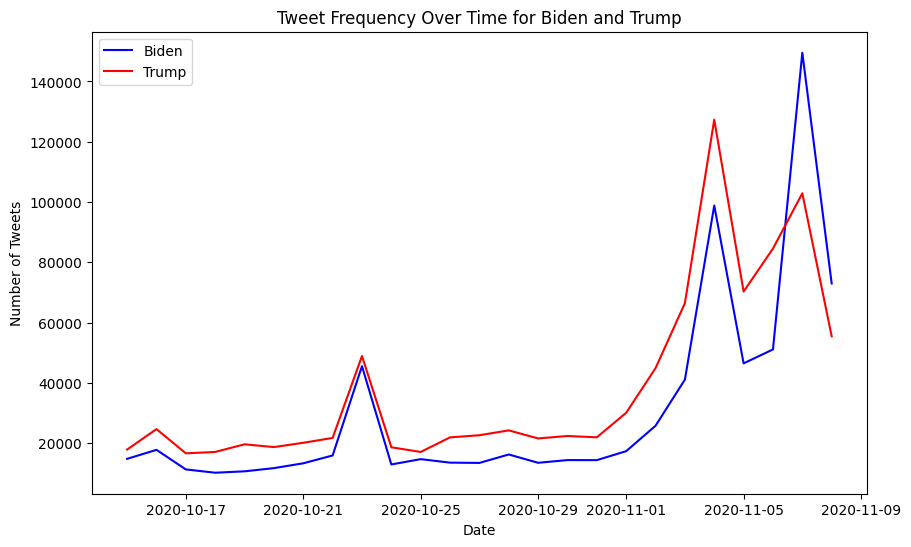

In [34]:
import matplotlib.pyplot as plt

# Group by date and count tweets for Biden
tweet_frequency_biden = df_joebiden.groupby(df_joebiden['created_at'].dt.date)['tweet_id'].count()

# Group by date and count tweets for Trump
tweet_frequency_trump = df_donaldtrump.groupby(df_donaldtrump['created_at'].dt.date)['tweet_id'].count()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tweet_frequency_biden.index, tweet_frequency_biden.values, label='Biden', color='blue')
plt.plot(tweet_frequency_trump.index, tweet_frequency_trump.values, label='Trump', color='red')

plt.title('Tweet Frequency Over Time for Biden and Trump')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()


User activity 

In [35]:
# Tweets per user for biden
user_activity_biden = df_joebiden.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)

# Display top 10 most active users
print(user_activity_biden.head(10))

user_id
1.2449822077033308e+18    1259
74268619.0                1163
874258472.0               1059
23954327.0                 922
1.0247779165409649e+18     560
755798016.0                517
1.2423507214643364e+18     486
1.304249338504401e+18      476
54361678.0                 456
386395062.0                442
Name: tweet_id, dtype: int64


In [36]:
# Tweets per user for trump
user_activity_trump = df_donaldtrump.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)

# Display top 10 most active users
print(user_activity_trump.head(10))

user_id
74268619.0                1352
40173650.0                1324
4132841.0                  980
386395062.0                959
23954327.0                 921
1.0119529969079624e+18     895
208607949.0                852
1.1549521668152812e+18     785
1.1997681328327762e+18     760
9.751178113653596e+17      709
Name: tweet_id, dtype: int64


In [37]:
df_joebiden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768380 entries, 0 to 777072
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            768380 non-null  datetime64[ns]
 1   tweet                 768380 non-null  object        
 2   retweet_count         768380 non-null  float64       
 3   user_id               768380 non-null  object        
 4   user_screen_name      768380 non-null  object        
 5   user_join_date        768274 non-null  datetime64[ns]
 6   user_followers_count  768274 non-null  object        
 7   user_location         537655 non-null  object        
 8   lat                   351707 non-null  object        
 9   long                  351707 non-null  object        
 10  country               350196 non-null  object        
 11  continent             350214 non-null  object        
 12  state                 257649 non-null  object        
 13  stat

In [38]:
# Columns to convert to numeric
columns_to_convert = ['user_id', 'user_followers_count', 'lat', 'long']
#Biden
df_joebiden['user_id_numeric'] = pd.to_numeric(df_joebiden['user_id'], errors='coerce')
df_joebiden['user_followers_count_numeric'] = pd.to_numeric(df_joebiden['user_followers_count'], errors='coerce')
df_joebiden['lat_numeric'] = pd.to_numeric(df_joebiden['lat'], errors='coerce')
df_joebiden['long_numeric'] = pd.to_numeric(df_joebiden['long'], errors='coerce')
# Trump 
df_donaldtrump['user_id_numeric'] = pd.to_numeric(df_donaldtrump['user_id'], errors='coerce')
df_donaldtrump['user_followers_count_numeric'] = pd.to_numeric(df_donaldtrump['user_followers_count'], errors='coerce')
df_donaldtrump['lat_numeric'] = pd.to_numeric(df_donaldtrump['lat'], errors='coerce')
df_donaldtrump['long_numeric'] = pd.to_numeric(df_donaldtrump['long'], errors='coerce')

In [39]:
# Drop rows where numeric is NaN 
#Biden
df_joebiden = df_joebiden.dropna(subset=['user_id_numeric'])
df_joebiden = df_joebiden.dropna(subset=['user_followers_count_numeric'])
df_joebiden = df_joebiden.dropna(subset=['lat_numeric'])
df_joebiden = df_joebiden.dropna(subset=['long_numeric'])

# Trump 
df_donaldtrump = df_donaldtrump.dropna(subset=['user_id_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['user_followers_count_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['lat_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['long_numeric'])

In [40]:
#Converting to int/float
#Biden
df_joebiden['user_id_numeric'] = df_joebiden['user_id_numeric'].astype('int64')
df_joebiden['user_followers_count_numeric'] = df_joebiden['user_followers_count_numeric'].astype('float64')
df_joebiden['lat_numeric'] = df_joebiden['lat_numeric'].astype('float64')
df_joebiden['long_numeric'] = df_joebiden['long_numeric'].astype('float64')

#Trump
df_donaldtrump['user_id_numeric'] = df_donaldtrump['user_id_numeric'].astype('int64')
df_donaldtrump['user_followers_count_numeric'] = df_donaldtrump['user_followers_count_numeric'].astype('float64')
df_donaldtrump['lat_numeric'] = df_donaldtrump['lat_numeric'].astype('float64')
df_donaldtrump['long_numeric'] = df_donaldtrump['long_numeric'].astype('float64')



In [41]:
# Drop the old column 
df_joebiden = df_joebiden.drop(columns=['user_id']).rename(columns={'user_id_numeric': 'user_id'})
df_joebiden = df_joebiden.drop(columns=['user_followers_count']).rename(columns={'user_followers_count_numeric': 'user_followers_count'})
df_joebiden = df_joebiden.drop(columns=['lat']).rename(columns={'lat_numeric': 'lat'})
df_joebiden = df_joebiden.drop(columns=['long']).rename(columns={'long_numeric': 'long'})

#Trump
df_donaldtrump = df_donaldtrump.drop(columns=['user_id']).rename(columns={'user_id_numeric': 'user_id'})
df_donaldtrump = df_donaldtrump.drop(columns=['user_followers_count']).rename(columns={'user_followers_count_numeric': 'user_followers_count'})
df_donaldtrump = df_donaldtrump.drop(columns=['lat']).rename(columns={'lat_numeric': 'lat'})
df_donaldtrump = df_donaldtrump.drop(columns=['long']).rename(columns={'long_numeric': 'long'})



In [42]:
df_joebiden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351707 entries, 0 to 777070
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            351707 non-null  datetime64[ns]
 1   tweet                 351707 non-null  object        
 2   retweet_count         351707 non-null  float64       
 3   user_screen_name      351707 non-null  object        
 4   user_join_date        351707 non-null  datetime64[ns]
 5   user_location         351707 non-null  object        
 6   country               350196 non-null  object        
 7   continent             350214 non-null  object        
 8   state                 257649 non-null  object        
 9   state_code            242153 non-null  object        
 10  collected_at          4 non-null       datetime64[ns]
 11  tweet_id              351707 non-null  int64         
 12  likes                 351707 non-null  float64       
 13  user

NaNs and duplicates in user_id's

In [43]:
na_user_id_biden = df_joebiden['user_id'].isna().sum()
na_user_id_biden

0

In [44]:
na_user_id_trump = df_donaldtrump['user_id'].isna().sum()
na_user_id_trump

0

In [45]:
# Check how many duplicate rows there are based on 'user_id' and 'tweet_id'
duplicates_trump_user_id = df_donaldtrump.duplicated(subset=['user_id', 'tweet_id']).sum()
print(duplicates_trump_user_id)

#usei_id vs tweet

0


In [46]:
duplicates_biden_user_id = df_joebiden.duplicated(subset=['user_id', 'tweet_id']).sum()
print(duplicates_biden_user_id)

0


User folowers NaN

In [47]:
na_user_followers_biden = df_joebiden['user_followers_count'].isna().sum()
na_user_followers_biden

0

In [48]:
na_user_followers_trump = df_donaldtrump['user_followers_count'].isna().sum()
na_user_followers_trump

0

In [49]:
df_joebiden['user_followers_count'].describe()

count    3.517070e+05
mean     5.168159e+04
std      5.219310e+05
min      0.000000e+00
25%      1.350000e+02
50%      6.970000e+02
75%      3.141000e+03
max      1.629713e+07
Name: user_followers_count, dtype: float64

Converting object columns to strings

In [50]:
df_joebiden['user_location'] = df_joebiden['user_location'].fillna('').astype(str)
df_joebiden['country'] = df_joebiden['country'].fillna('').astype(str)
df_joebiden['continent'] = df_joebiden['continent'].fillna('').astype(str)
df_joebiden['state'] = df_joebiden['state'].fillna('').astype(str)
df_joebiden['state_code'] = df_joebiden['state_code'].fillna('').astype(str)
df_joebiden['user_screen_name'] = df_joebiden['user_screen_name'].fillna('').astype(str)
df_joebiden['tweet'] = df_joebiden['tweet'].fillna('').astype(str)

In [51]:
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].astype(str)
df_donaldtrump['country'] = df_donaldtrump['country'].astype(str)
df_donaldtrump['continent'] = df_donaldtrump['continent'].astype(str)
df_donaldtrump['state'] = df_donaldtrump['state'].astype(str)
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].astype(str)
df_donaldtrump['user_screen_name'] = df_donaldtrump['user_screen_name'].astype(str)
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].astype(str)

In [52]:
df_donaldtrump.dtypes

created_at              datetime64[ns]
tweet                           object
retweet_count                  float64
user_screen_name                object
user_join_date          datetime64[ns]
user_location                   object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
tweet_id                         int64
likes                          float64
user_id                          int64
user_followers_count           float64
lat                            float64
long                           float64
dtype: object

In [53]:
print(df_joebiden['user_location'].apply(lambda x: isinstance(x, str)).all())


True


In [55]:
print(df_joebiden['tweet'].apply(lambda x: isinstance(x, str)).all())


True


In [56]:
print(df_joebiden['user_screen_name'].apply(lambda x: isinstance(x, str)).all())


True


In [57]:
print(df_joebiden['country'].apply(lambda x: isinstance(x, str)).all())


True


Column user_screen_name exploration. Joe Biden

In [58]:
biden_user_screen_name_na = df_joebiden['user_screen_name'].isna().sum()
biden_user_screen_name_na

0

In [59]:
df_user_counts = df_joebiden['user_screen_name'].value_counts()
df_user_counts

user_screen_name
steveziegenbus2    1259
revue2presse       1163
JournalistJG       1059
Hotpage_News        922
tismdude            486
                   ... 
SohalHarjas           1
bolderdenei           1
jaggo2210             1
NotLazyBong           1
MrErdem23             1
Name: count, Length: 131544, dtype: int64

In [60]:
trump_user_screen_name_na = df_donaldtrump['user_screen_name'].isna().sum()
trump_user_screen_name_na

0

In [61]:
# Group by user_screen_name and aggregate, including the country
biden_top_users = df_joebiden.groupby('user_screen_name').agg(
    tweet_count=('tweet_id', 'count'),  # Count number of tweets per user
    max_followers=('user_followers_count', 'max'),  # Get the maximum follower count per user
    country=('country', 'first')  # Retain the first occurrence of country
).reset_index()

# Sort by maximum followers in descending order
biden_top_users = biden_top_users.sort_values(by='max_followers', ascending=False)

# Select the top 20 users with the most followers
biden_top_20_users = biden_top_users.head(20)

# Display the top 20 users by their max followers and tweet count, including country
print(biden_top_20_users[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

       user_screen_name  max_followers  tweet_count                   country
86405          detikcom     16297130.0           77                 Indonesia
111297             ndtv     13940930.0           32                     India
11314      CGTNOfficial     13783747.0           10                     China
126561     timesofindia     13216354.0           10                     India
83785         cnnarabic     12034151.0           39      United Arab Emirates
73955            aajtak     11351589.0           82                     India
1432            ABPNews     10563327.0          192                     India
130977            youm7      9635394.0            5                     Egypt
42066        MarceloTas      9423063.0            2                    Brazil
127690        tvOneNews      8882196.0            7                 Indonesia
110596   muyinteresante      8398408.0            1                     Spain
102724        kompascom      7863661.0           13             

detikcom – This is a popular Indonesian online news portal.
ndtv – NDTV (New Delhi Television) is one of India's leading news networks.
CGTNOfficial – CGTN (China Global Television Network) is a Chinese international English-language news channel.
timesofindia – The Times of India is one of the largest English-language daily newspapers in India.
cnnarabic – The Arabic version of CNN, a well-known international news network.
aajtak – Aaj Tak is a leading Hindi news channel in India.
ABPNews – Another major Hindi news network in India.
MarceloTas – Marcelo Tas is a Brazilian TV host, journalist, and author.
HaifaWehbe – Haifa Wehbe is a famous Lebanese singer and actress.
PDChina – People's Daily China is an official newspaper of the Communist Party of China.
PerezHilton – Perez Hilton is a well-known American celebrity blogger and media personality.

In [62]:
# Sort by tweet count in descending order
biden_top_users_sorted_by_tweets = biden_top_20_users.sort_values(by='tweet_count', ascending=False)

# Display the sorted data
print(biden_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])


       user_screen_name  max_followers  tweet_count                   country
1432            ABPNews     10563327.0          192                     India
73955            aajtak     11351589.0           82                     India
125495        the_hindu      6505330.0           81                     India
86405          detikcom     16297130.0           77                 Indonesia
83785         cnnarabic     12034151.0           39      United Arab Emirates
111297             ndtv     13940930.0           32                     India
102724        kompascom      7863661.0           13                 Indonesia
94932          htTweets      7808110.0           11                     India
11314      CGTNOfficial     13783747.0           10                     China
126561     timesofindia     13216354.0           10                     India
112437              ntv      7491484.0            9                    Turkey
127690        tvOneNews      8882196.0            7             

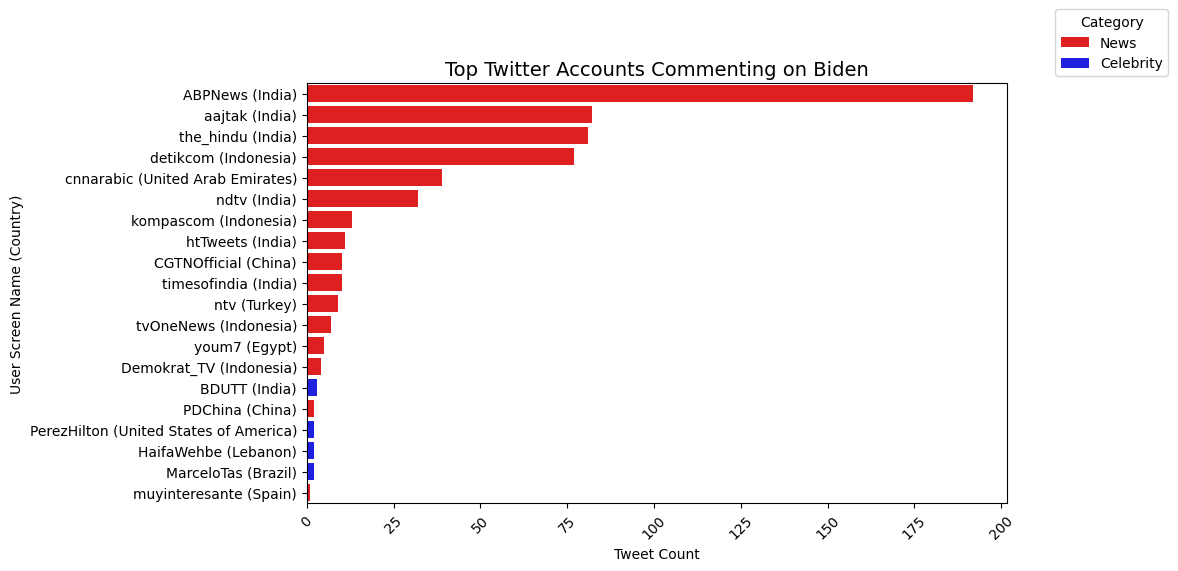

       user_screen_name  max_followers  tweet_count                   country
1432            ABPNews     10563327.0          192                     India
73955            aajtak     11351589.0           82                     India
125495        the_hindu      6505330.0           81                     India
86405          detikcom     16297130.0           77                 Indonesia
83785         cnnarabic     12034151.0           39      United Arab Emirates
111297             ndtv     13940930.0           32                     India
102724        kompascom      7863661.0           13                 Indonesia
94932          htTweets      7808110.0           11                     India
11314      CGTNOfficial     13783747.0           10                     China
126561     timesofindia     13216354.0           10                     India
112437              ntv      7491484.0            9                    Turkey
127690        tvOneNews      8882196.0            7             

In [63]:
# Combine user_screen_name and country into a single column for the x-axis
biden_top_users_sorted_by_tweets['user_country'] = (
    biden_top_users_sorted_by_tweets['user_screen_name'] + 
    ' (' + biden_top_users_sorted_by_tweets['country'] + ')'
)

# Define news providers and celebrities
news_providers = ['ABPNews', 'aajtak', 'the_hindu', 'detikcom', 'cnnarabic', 'ndtv', 
                  'kompascom', 'htTweets', 'CGTNOfficial', 'timesofindia', 'ntv', 
                  'tvOneNews', 'PDChina', 'Demokrat_TV', 'youm7', 'muyinteresante']
celebrities = ['BDUTT', 'PerezHilton', 'HaifaWehbe', 'MarceloTas']

# Apply category based on user_screen_name
biden_top_users_sorted_by_tweets['category'] = biden_top_users_sorted_by_tweets['user_screen_name'].apply(
    lambda x: 'News' if x in news_providers else ('Celebrity' if x in celebrities else 'Other')
)

# Set the color palette manually for the categories
color_palette = {'News': 'red', 'Celebrity': 'blue', 'Other': 'green'}

# Create the Seaborn barplot with combined x-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x='tweet_count', y='user_country', data=biden_top_users_sorted_by_tweets, hue='category', dodge=False, palette=color_palette)

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Tweet Count', fontsize=10)
plt.ylabel('User Screen Name (Country)', fontsize=10)
plt.title('Top Twitter Accounts Commenting on Biden', fontsize=14)

# Position the legend on the right side
plt.legend(title='Category', loc='lower center', bbox_to_anchor=(1.15, 1))
# Adjust layout manually
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Show the plot
plt.show()

# Display the sorted data
print(biden_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

In [64]:
#Trump user_screen_name
# Group by user_screen_name and aggregate, including the country
trump_top_users = df_donaldtrump.groupby('user_screen_name').agg(
    tweet_count=('tweet_id', 'count'),  # Count number of tweets per user
    max_followers=('user_followers_count', 'max'),  # Get the maximum follower count per user
    country=('country', 'first')  # Retain the first occurrence of country
).reset_index()

# Sort by maximum followers in descending order
trump_top_users = trump_top_users.sort_values(by='max_followers', ascending=False)

# Select the top 20 users with the most followers
trump_top_20_users = trump_top_users.head(20)

# Display the top 20 users by their max followers and tweet count, including country
print(trump_top_20_users[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

       user_screen_name  max_followers  tweet_count                   country
80646          detikcom     16296938.0           77                 Indonesia
103087             ndtv     13933195.0            9                     India
10615      CGTNOfficial     13783686.0            7                     China
116908     timesofindia     13216027.0            2                     India
78192         cnnarabic     12033941.0           12      United Arab Emirates
69259            aajtak     11351240.0           72                     India
1383            ABPNews     10563040.0          185                     India
117953        tvOneNews      8878481.0            5                 Indonesia
46086       NoticiasRCN      8005483.0            1                  Colombia
95392         kompascom      7863538.0           13                 Indonesia
116584        thevirdas      7838475.0            1                     India
88571          htTweets      7808079.0            5             

In [65]:
# Sort by tweet count in descending order
trump_top_users_sorted_by_tweets = trump_top_20_users.sort_values(by='tweet_count', ascending=False)

# Display the sorted data
print(trump_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

       user_screen_name  max_followers  tweet_count                   country
1383            ABPNews     10563040.0          185                     India
28005        IndiaToday      5408702.0          153                     India
115911        the_hindu      6505290.0           82                     India
80646          detikcom     16296938.0           77                 Indonesia
69259            aajtak     11351240.0           72                     India
95392         kompascom      7863538.0           13                 Indonesia
78192         cnnarabic     12033941.0           12      United Arab Emirates
103087             ndtv     13933195.0            9                     India
104093              ntv      7491407.0            8                    Turkey
10615      CGTNOfficial     13783686.0            7                     China
117953        tvOneNews      8878481.0            5                 Indonesia
88571          htTweets      7808079.0            5             

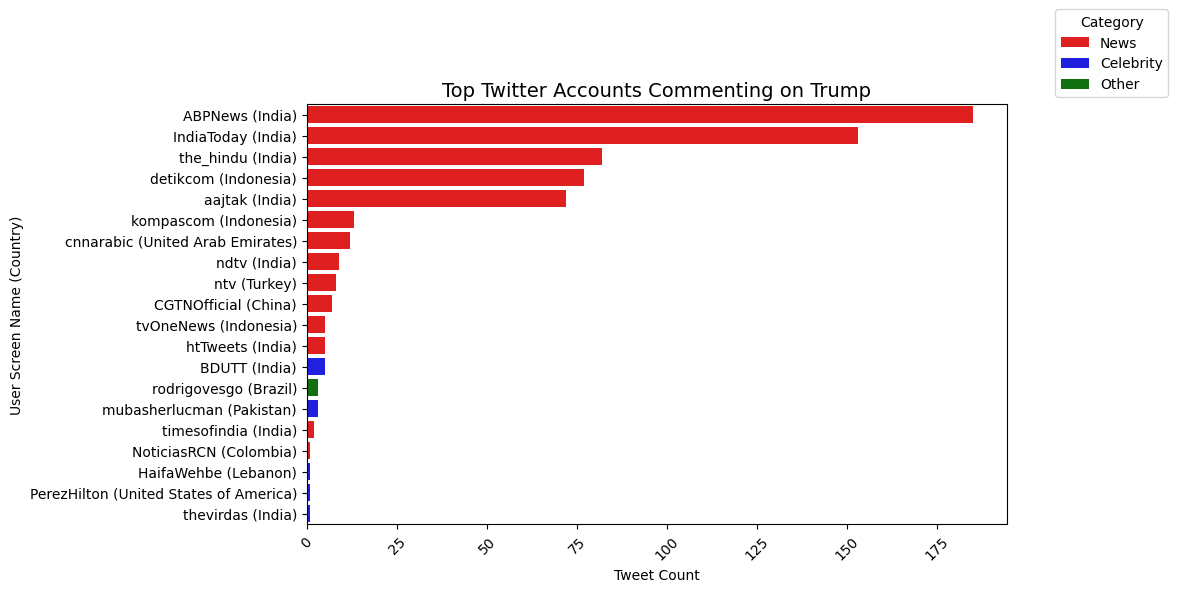

       user_screen_name  max_followers  tweet_count                   country
1383            ABPNews     10563040.0          185                     India
28005        IndiaToday      5408702.0          153                     India
115911        the_hindu      6505290.0           82                     India
80646          detikcom     16296938.0           77                 Indonesia
69259            aajtak     11351240.0           72                     India
95392         kompascom      7863538.0           13                 Indonesia
78192         cnnarabic     12033941.0           12      United Arab Emirates
103087             ndtv     13933195.0            9                     India
104093              ntv      7491407.0            8                    Turkey
10615      CGTNOfficial     13783686.0            7                     China
117953        tvOneNews      8878481.0            5                 Indonesia
88571          htTweets      7808079.0            5             

In [66]:
# Combine user_screen_name and country into a single column for the x-axis
trump_top_users_sorted_by_tweets['user_country'] = (
    trump_top_users_sorted_by_tweets['user_screen_name'] + 
    ' (' + trump_top_users_sorted_by_tweets['country'] + ')'
)

# News providers and celebrities

news_providers = ['ABPNews', 'aajtak', 'the_hindu', 'detikcom', 'cnnarabic', 'ndtv', 
                  'kompascom', 'htTweets', 'CGTNOfficial', 'timesofindia', 'ntv', 
                  'tvOneNews', 'PDChina', 'Demokrat_TV', 'youm7', 'muyinteresante',
                  'IndiaToday', 'NoticiasRCN']

celebrities = ['BDUTT', 'PerezHilton', 'HaifaWehbe', 'thevirdas', 'mubasherlucman']


# Apply category based on user_screen_name
trump_top_users_sorted_by_tweets['category'] = trump_top_users_sorted_by_tweets['user_screen_name'].apply(
    lambda x: 'News' if x in news_providers else ('Celebrity' if x in celebrities else 'Other')
)

# Set the color palette manually for the categories
color_palette = {'News': 'red', 'Celebrity': 'blue', 'Other': 'green'}

# Create the Seaborn barplot with combined x-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x='tweet_count', y='user_country', data=trump_top_users_sorted_by_tweets, hue='category', dodge=False, palette=color_palette)

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Tweet Count', fontsize=10)
plt.ylabel('User Screen Name (Country)', fontsize=10)
plt.title('Top Twitter Accounts Commenting on Trump', fontsize=14)

# Position the legend on the right side
plt.legend(title='Category', loc='lower center', bbox_to_anchor=(1.15, 1))
# Adjust layout manually
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Show the plot
plt.show()

# Display the sorted data
print(trump_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

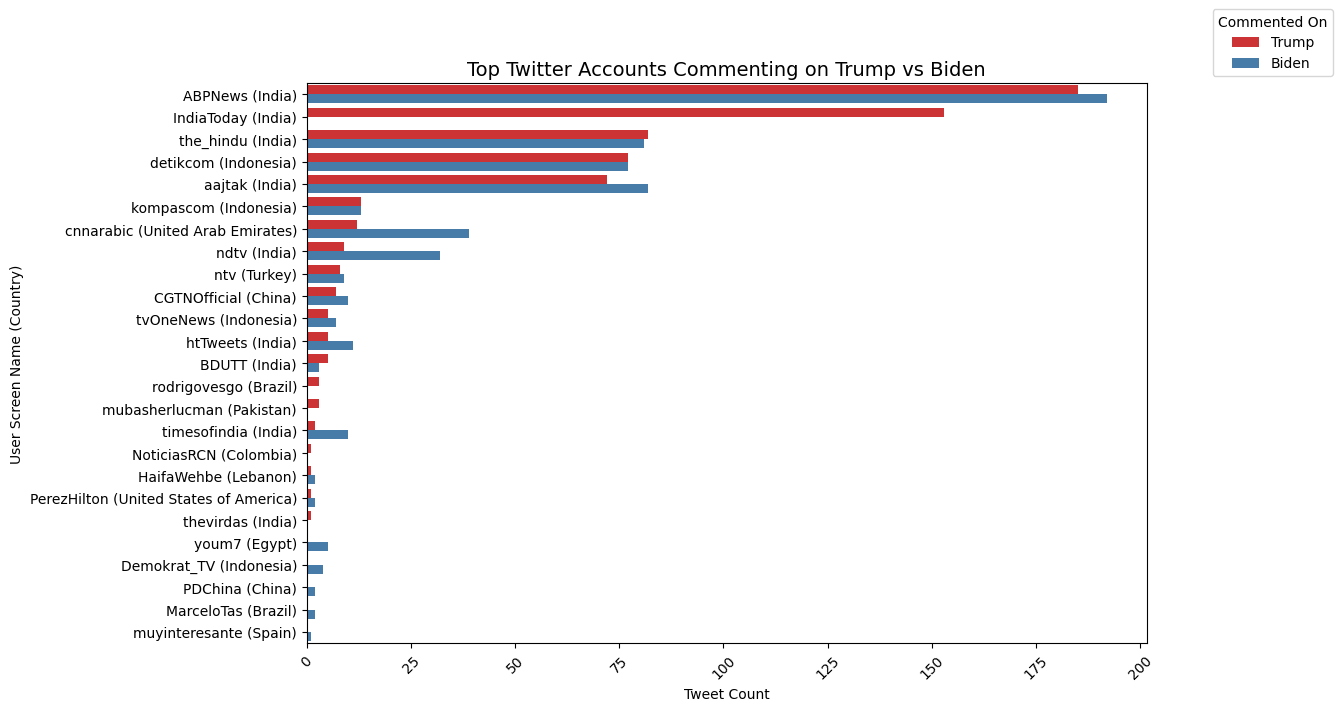

       user_screen_name  max_followers  tweet_count                   country  \
1383            ABPNews     10563040.0          185                     India   
28005        IndiaToday      5408702.0          153                     India   
115911        the_hindu      6505290.0           82                     India   
80646          detikcom     16296938.0           77                 Indonesia   
69259            aajtak     11351240.0           72                     India   
95392         kompascom      7863538.0           13                 Indonesia   
78192         cnnarabic     12033941.0           12      United Arab Emirates   
103087             ndtv     13933195.0            9                     India   
104093              ntv      7491407.0            8                    Turkey   
10615      CGTNOfficial     13783686.0            7                     China   
117953        tvOneNews      8878481.0            5                 Indonesia   
88571          htTweets     

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column to indicate whether the tweet is about Trump or Biden
trump_top_users_sorted_by_tweets['commented_on'] = 'Trump'
biden_top_users_sorted_by_tweets['commented_on'] = 'Biden'

# Combine both datasets into one
combined_data = pd.concat([trump_top_users_sorted_by_tweets, biden_top_users_sorted_by_tweets])

# Combine user_screen_name and country into a single column for the x-axis
combined_data['user_country'] = (
    combined_data['user_screen_name'] + ' (' + combined_data['country'] + ')'
)

# Define news providers and celebrities
news_providers = ['ABPNews', 'aajtak', 'the_hindu', 'detikcom', 'cnnarabic', 'ndtv', 
                  'kompascom', 'htTweets', 'CGTNOfficial', 'timesofindia', 'ntv', 
                  'tvOneNews', 'PDChina', 'Demokrat_TV', 'youm7', 'muyinteresante',
                  'IndiaToday', 'NoticiasRCN']

celebrities = ['BDUTT', 'PerezHilton', 'HaifaWehbe', 'thevirdas', 'mubasherlucman', 'MarceloTas']

# Apply category based on user_screen_name
combined_data['category'] = combined_data['user_screen_name'].apply(
    lambda x: 'News' if x in news_providers else ('Celebrity' if x in celebrities else 'Other')
)

# Set the color palette manually for the categories
color_palette = {'News': 'red', 'Celebrity': 'blue', 'Other': 'green'}

# Create the Seaborn barplot with combined x-axis labels and include 'commented_on' as hue
plt.figure(figsize=(12, 8))
sns.barplot(x='tweet_count', y='user_country', data=combined_data, hue='commented_on', dodge=True, palette='Set1')

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Tweet Count', fontsize=10)
plt.ylabel('User Screen Name (Country)', fontsize=10)
plt.title('Top Twitter Accounts Commenting on Trump vs Biden', fontsize=14)

# Position the legend on the right side
plt.legend(title='Commented On', loc='lower center', bbox_to_anchor=(1.15, 1))

# Adjust layout manually
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Show the plot
plt.show()

# Display the combined sorted data
print(combined_data[['user_screen_name', 'max_followers', 'tweet_count', 'country', 'commented_on']])


In [68]:
df_joebiden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351707 entries, 0 to 777070
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            351707 non-null  datetime64[ns]
 1   tweet                 351707 non-null  object        
 2   retweet_count         351707 non-null  float64       
 3   user_screen_name      351707 non-null  object        
 4   user_join_date        351707 non-null  datetime64[ns]
 5   user_location         351707 non-null  object        
 6   country               351707 non-null  object        
 7   continent             351707 non-null  object        
 8   state                 351707 non-null  object        
 9   state_code            351707 non-null  object        
 10  collected_at          4 non-null       datetime64[ns]
 11  tweet_id              351707 non-null  int64         
 12  likes                 351707 non-null  float64       
 13  user

In [69]:
df_donaldtrump.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440435 entries, 0 to 971080
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            440435 non-null  datetime64[ns]
 1   tweet                 440435 non-null  object        
 2   retweet_count         440435 non-null  float64       
 3   user_screen_name      440435 non-null  object        
 4   user_join_date        440435 non-null  datetime64[ns]
 5   user_location         440435 non-null  object        
 6   country               440435 non-null  object        
 7   continent             440435 non-null  object        
 8   state                 440435 non-null  object        
 9   state_code            440435 non-null  object        
 10  collected_at          1 non-null       datetime64[ns]
 11  tweet_id              440435 non-null  int64         
 12  likes                 440435 non-null  float64       
 13  user

In [70]:
# Droping the 'collected_at' column in Biden df
df_joebiden.drop(columns=['collected_at'], inplace=True)


In [71]:
# Drop the 'collected_at' column in Trump df
df_donaldtrump.drop(columns=['collected_at'], inplace=True)


In [72]:
biden_top_activists = df_joebiden.groupby('user_screen_name').agg(
    tweet_count=('tweet_id', 'count'),  # Count number of tweets per user
    country=('country', 'first')  # Retain the first occurrence of country
).reset_index()

# Sort by tweet_counts
biden_top_activists = biden_top_activists.sort_values(by='tweet_count', ascending=False)

# Select users with over 20 tweets
biden_top_activists = biden_top_activists[biden_top_activists['tweet_count'] > 50]

print(biden_top_activists[['user_screen_name', 'tweet_count', 'country']])

       user_screen_name  tweet_count                   country
123603  steveziegenbus2         1259  United States of America
117684     revue2presse         1163                    France
34029      JournalistJG         1059  United States of America
28174      Hotpage_News          922             United States
126672         tismdude          486                 Australia
...                 ...          ...                       ...
42323         MarieHyde           51             United States
87127               dna           51                     India
84282    country1st2020           51  United States of America
127914       ucant5eeme           51                   Germany
109780    morandiniblog           51                    France

[526 rows x 3 columns]


C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\3258982475.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=country_tweet_counts, x='tweet_count', y='country', palette='Set2')


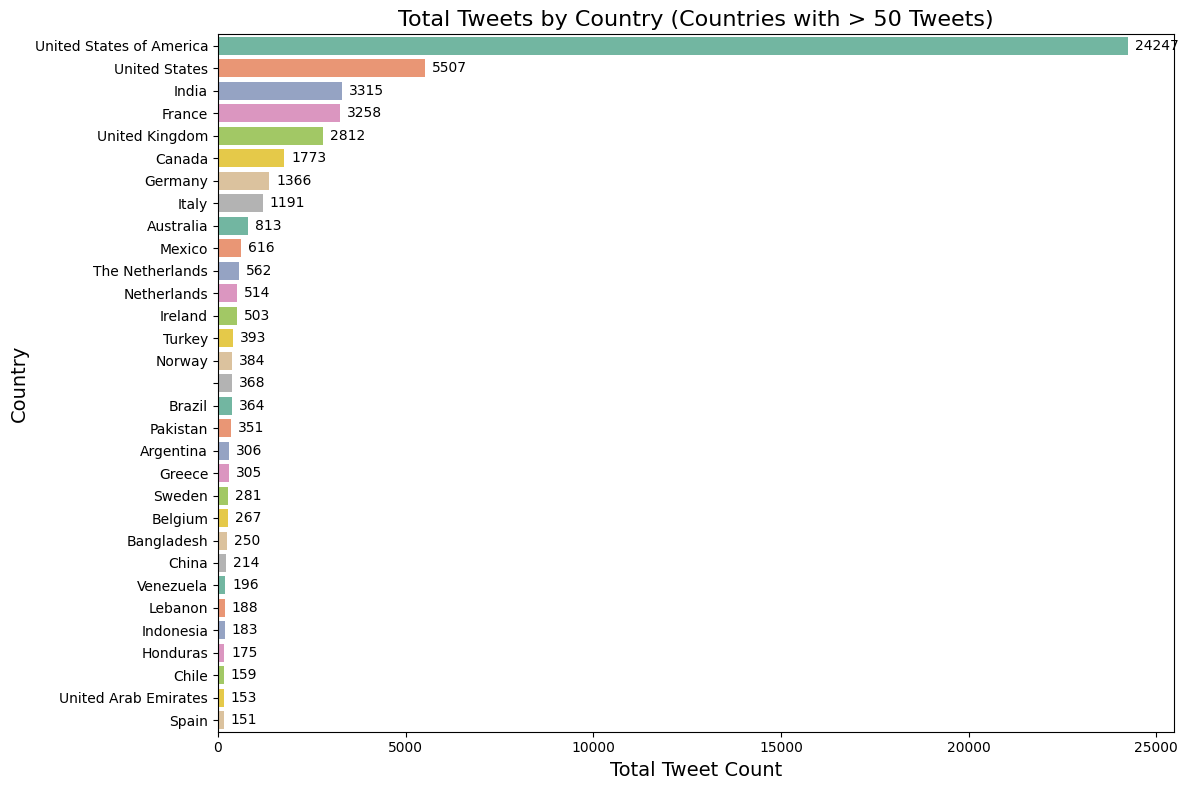

In [73]:
# Group by country and sum tweet counts
country_tweet_counts = biden_top_activists.groupby('country')['tweet_count'].sum().reset_index()

# Filter for countries with total tweets over 150
country_tweet_counts = country_tweet_counts[country_tweet_counts['tweet_count'] > 150]

# Sort by tweet counts in descending order
country_tweet_counts = country_tweet_counts.sort_values(by='tweet_count', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=country_tweet_counts, x='tweet_count', y='country', palette='Set2')

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', fontsize=10, color='black', 
                      xytext=(5, 0), textcoords='offset points')

# Customize the plot
plt.title('Total Tweets by Country (Countries with > 50 Tweets)', fontsize=16)
plt.xlabel('Total Tweet Count', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Cleaning of string Columns: Countries, tweet and user_location continent, state cleaning

In [74]:
#Strip of whitespaces Biden
df_joebiden['tweet'] = df_joebiden['tweet'].str.strip()
df_joebiden['user_location'] = df_joebiden['user_location'].str.strip()
df_joebiden['country'] = df_joebiden['country'].str.strip()
df_joebiden['continent'] = df_joebiden['continent'].str.strip()
df_joebiden['state'] = df_joebiden['state'].str.strip()
df_joebiden['state_code'] = df_joebiden['state_code'].str.strip()

In [75]:
#Trump whitespaces
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].str.strip()
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].str.strip()
df_donaldtrump['country'] = df_donaldtrump['country'].str.strip()
df_donaldtrump['continent'] = df_donaldtrump['continent'].str.strip()
df_donaldtrump['state'] = df_donaldtrump['state'].str.strip()
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].str.strip()

In [76]:
#Lowercase
df_joebiden['tweet'] = df_joebiden['tweet'].str.lower()
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].str.lower()

In [77]:
#Replacement of special symbols Trump
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].str.replace(r'[\/><*+@]', '', regex=True)
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].str.replace(r'[\/><*+@]', '', regex=True)
df_donaldtrump['country'] = df_donaldtrump['country'].str.replace(r'[\/><*+@]', '', regex=True)
df_donaldtrump['continent'] = df_donaldtrump['continent'].str.replace(r'[\/><*+@]', '', regex=True)
df_donaldtrump['state'] = df_donaldtrump['state'].str.replace(r'[\/><*+@]', '', regex=True)
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].str.replace(r'[\/><*+@]', '', regex=True)


In [79]:
#Replacement of special symbols Biden
df_joebiden['tweet'] = df_joebiden['tweet'].str.replace(r'[\/><*+@]', '', regex=True)
df_joebiden['user_location'] = df_joebiden['user_location'].str.replace(r'[\/><*+@]', '', regex=True)
df_joebiden['country'] = df_joebiden['country'].str.replace(r'[\/><*+@]', '', regex=True)
df_joebiden['continent'] = df_joebiden['continent'].str.replace(r'[\/><*+@]', '', regex=True)
df_joebiden['state'] = df_joebiden['state'].str.replace(r'[\/><*+@]', '', regex=True)
df_joebiden['state_code'] = df_joebiden['state_code'].str.replace(r'[\/><*+@]', '', regex=True)

In [80]:
#Strip of duoble whitespaces Biden
df_joebiden['tweet'] = df_joebiden['tweet'].str.replace(r'\s+', ' ', regex=True)
df_joebiden['user_location'] = df_joebiden['user_location'].str.replace(r'\s+', ' ', regex=True)
df_joebiden['country'] = df_joebiden['country'].str.replace(r'\s+', ' ', regex=True)
df_joebiden['continent'] = df_joebiden['continent'].str.replace(r'\s+', ' ', regex=True)
df_joebiden['state'] = df_joebiden['state'].str.replace(r'\s+', ' ', regex=True)
df_joebiden['state_code'] = df_joebiden['state_code'].str.replace(r'\s+', ' ', regex=True)


In [81]:
#Strip of double whitespaces Trump
#Replacement of special symbols Trump
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].str.replace(r'\s+', ' ', regex=True)
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].str.replace(r'\s+', ' ', regex=True)
df_donaldtrump['country'] = df_donaldtrump['country'].str.replace(r'\s+', ' ', regex=True)
df_donaldtrump['continent'] = df_donaldtrump['continent'].str.replace(r'\s+', ' ', regex=True)
df_donaldtrump['state'] = df_donaldtrump['state'].str.replace(r'\s+', ' ', regex=True)
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].str.replace(r'\s+', ' ', regex=True)


In [82]:
#Fill na with spaces Biden
df_joebiden['tweet'] = df_joebiden['tweet'].fillna('')
df_joebiden['user_location'] = df_joebiden['user_location'].fillna('')
df_joebiden['country'] = df_joebiden['country'].fillna('')
df_joebiden['continent'] = df_joebiden['continent'].fillna('')
df_joebiden['state'] = df_joebiden['state'].fillna('')
df_joebiden['state_code'] = df_joebiden['state_code'].fillna('')


In [83]:
#Fill na with spaces Trump
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].fillna('')
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].fillna('')
df_donaldtrump['country'] = df_donaldtrump['country'].fillna('')
df_donaldtrump['continent'] = df_donaldtrump['continent'].fillna('')
df_donaldtrump['state'] = df_donaldtrump['state'].fillna('')
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].fillna('')

In [84]:
from bs4 import BeautifulSoup
#Drop html tags
df_joebiden['tweet'] = df_joebiden['tweet'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_joebiden['user_location'] = df_joebiden['user_location'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_joebiden['country'] = df_joebiden['country'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_joebiden['continent'] = df_joebiden['continent'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_joebiden['state'] = df_joebiden['state'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_joebiden['state_code'] = df_joebiden['state_code'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\1442396247.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_joebiden['tweet'] = df_joebiden['tweet'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\1442396247.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_joebiden['user_location'] = df_joebiden['user_location'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [85]:
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_donaldtrump['country'] = df_donaldtrump['country'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_donaldtrump['continent'] = df_donaldtrump['continent'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_donaldtrump['state'] = df_donaldtrump['state'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\1717495489.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_donaldtrump['tweet'] = df_donaldtrump['tweet'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\1717495489.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_donaldtrump['user_location'] = df_donaldtrump['user_location'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [86]:
#Drop emojies and smileys in both datasets
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].str.encode('ascii', 'ignore').str.decode('ascii')
df_joebiden['tweet'] = df_joebiden['tweet'].str.encode('ascii', 'ignore').str.decode('ascii')

In [87]:
#Group tweets and count duplicates
df_joebiden['tweet_count'] = df_joebiden.groupby('tweet')['tweet'].transform('count')

In [88]:
df_donaldtrump['tweet_count'] = df_donaldtrump.groupby('tweet')['tweet'].transform('count')

In [89]:
biden_tweet_total_duplicates = df_joebiden['tweet_count'].sum() - len(df_joebiden['tweet'].unique())
print(f"Anzahl der doppelten Tweets: {biden_tweet_total_duplicates}")

Anzahl der doppelten Tweets: 3485


In [90]:
trump_tweet_total_duplicates = df_donaldtrump['tweet_count'].sum() - len(df_donaldtrump['tweet'].unique())
print(f"Anzahl der doppelten Tweets: {trump_tweet_total_duplicates}")

Anzahl der doppelten Tweets: 2117


In [91]:
#Drop duplicated tweets Biden
df_joebiden_clean = df_joebiden.drop_duplicates(subset=['tweet'])

In [92]:
#Drop duplicated tweets Trump
df_donald_trump_clean = df_donaldtrump.drop_duplicates(subset = ['tweet'])

In [94]:
remaining_duplicates_biden = df_joebiden_clean.duplicated(subset=['tweet']).sum()
print(f"Anzahl der verbleibenden doppelten Tweets: {remaining_duplicates_biden}")

Anzahl der verbleibenden doppelten Tweets: 0


In [95]:
remaining_duplicates_trump = df_donald_trump_clean.duplicated(subset=['tweet']).sum()
print(f"Anzahl der verbleibenden doppelten Tweets: {remaining_duplicates_trump}")

Anzahl der verbleibenden doppelten Tweets: 0


In [96]:
import re

In [97]:
unusual_characters_biden = df_joebiden_clean[df_joebiden_clean['tweet'].str.contains(r'[^a-zA-Z0-9\s\.,?!\'\"]')]

# Zeige einige Beispiel-Tweets mit ungewöhnlichen Zeichen
print(unusual_characters_biden['tweet'].head())

0     #elecciones2020 | en #florida: #joebiden dice ...
2     islandgirlprv bradbeauregardj meidastouch this...
4     #censorship #hunterbiden #biden #bidenemails #...
6     in 2020, #nypost is being #censorship #censore...
11    fbi allegedly obtained hunter biden computer, ...
Name: tweet, dtype: object


In [98]:
unusual_characters_trump = df_donald_trump_clean[df_donald_trump_clean['tweet'].str.contains(r'[^a-zA-Z0-9\s\.,?!\'\"]')]

# Zeige einige Beispiel-Tweets mit ungewöhnlichen Zeichen
print(unusual_characters_trump['tweet'].head())

0    #elecciones2020 | en #florida: #joebiden dice ...
2    #trump: as a student i used to hear for years,...
4    you get a tie! and you get a tie! #trump s ral...
5    clady62 her 15 minutes were over long time ago...
7    deeviousdenise realdonaldtrump nypost there wo...
Name: tweet, dtype: object


In [99]:
#Biden
# Entferne Hashtags
df_joebiden_clean['tweet'] = df_joebiden_clean['tweet'].str.replace(r'#\w+', '', regex=True)
# Entferne Erwähnungen, die am Anfang stehen
df_joebiden_clean['tweet'] = df_joebiden_clean['tweet'].str.replace(r'^\w+\s\w+\s\w+', '', regex=True)
# Entferne URLs
df_joebiden_clean['tweet'] = df_joebiden_clean['tweet'].str.replace(r'http[s]?://\S+', '', regex=True)
# Entferne Tweets, die nach der Bereinigung leer sind
df_joebiden_clean = df_joebiden_clean[df_joebiden_clean['tweet'].str.strip() != '']


C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\3239094887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joebiden_clean['tweet'] = df_joebiden_clean['tweet'].str.replace(r'#\w+', '', regex=True)
C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\3239094887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joebiden_clean['tweet'] = df_joebiden_clean['tweet'].str.replace(r'^\w+\s\w+\s\w+', '', regex=True)
C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\3239094887.py:6: SettingWithCopyWarning:

In [100]:
#Trump
# Entferne Hashtags
df_donald_trump_clean['tweet'] = df_donald_trump_clean['tweet'].str.replace(r'#\w+', '', regex=True)
# Entferne Erwähnungen, die am Anfang stehen
df_donald_trump_clean['tweet'] = df_donald_trump_clean['tweet'].str.replace(r'^\w+\s\w+\s\w+', '', regex=True)
# Entferne URLs
df_donald_trump_clean['tweet'] = df_donald_trump_clean['tweet'].str.replace(r'http[s]?://\S+', '', regex=True)
# Entferne Tweets, die nach der Bereinigung leer sind
df_donaldtrump_clean = df_donald_trump_clean[df_donald_trump_clean['tweet'].str.strip() != '']


C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\2158583953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_donald_trump_clean['tweet'] = df_donald_trump_clean['tweet'].str.replace(r'#\w+', '', regex=True)
C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\2158583953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_donald_trump_clean['tweet'] = df_donald_trump_clean['tweet'].str.replace(r'^\w+\s\w+\s\w+', '', regex=True)
C:\Users\iurch\AppData\Local\Temp\ipykernel_20764\2158583953.py:7: Setting